# <center>Визуализация данных<center>

In [577]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np #установите данную библиотеку
import mplcursors

In [578]:
# global settings

sns.set_theme(style="darkgrid")

1. **Постройте график временного ряда , отображающий изменение температуры на протяжении недели. На графике должны быть отображены температуры на каждый день недели. Также небходимо дать корректные названия осям и самому графику (данное требование применимо ко всем заданиям)**

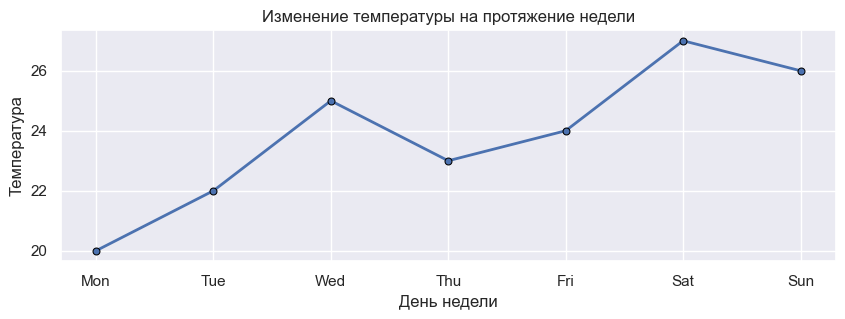

In [579]:
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
temperatures = [20, 22, 25, 23, 24, 27, 26]

f, ax = plt.subplots(figsize=(10, 3))

lineplot = sns.lineplot(x=weekdays, y=temperatures, marker='o', linewidth=2, markersize=5, markeredgecolor='black')

plt.title("Изменение температуры на протяжение недели")
plt.xlabel('День недели')
plt.ylabel('Температура')

plt.show()

2. **Создайте `DataFrame` из предоставленных списков. Постройте scatterplot, отображающий зависимость размера скидки и количества проданных товаров. Необходимо выделить категории товаров разными маркерами и цветами. С данной задачей поможет параметр `hue`.**


,Продукты,Скидки,Продажи
0,Shoes,10,50
1,Clothes,25,75
2,Accessories,15,60


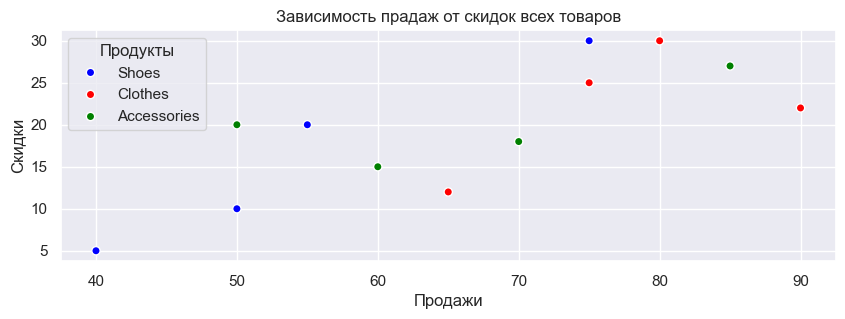

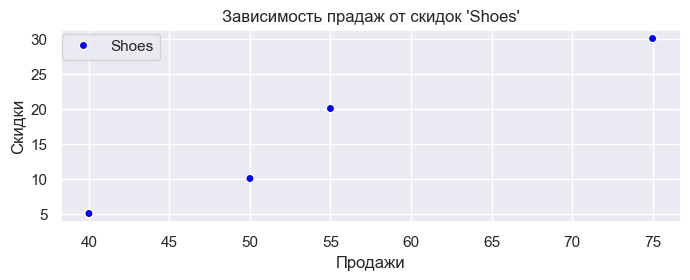

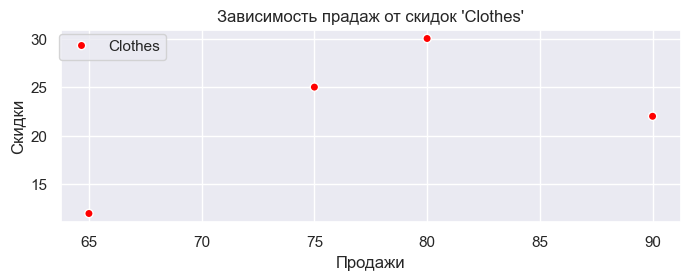

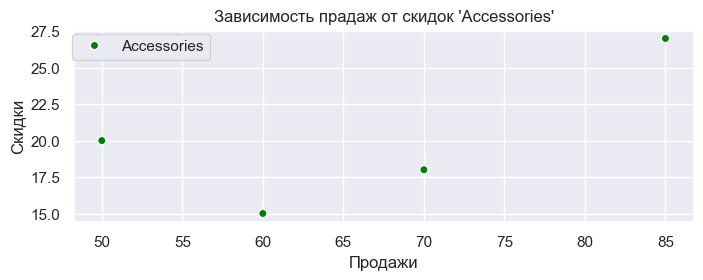

In [580]:
products = ['Shoes', 'Clothes', 'Accessories', 'Shoes', 'Clothes',
            'Accessories', 'Shoes', 'Clothes', 'Accessories', 'Shoes', 'Clothes', 'Accessories']
discounts = [10, 25, 15, 20, 30, 18, 5, 12, 20, 30, 22, 27]
sales = [50, 75, 60, 55, 80, 70, 40, 65, 50, 75, 90, 85]

obj = zip(products, discounts, sales)
df = pd.DataFrame(data=obj, columns=['products', 'discounts', 'sales'])
df = df.rename(columns= {'products': 'Продукты', 'discounts': 'Скидки', 'sales': 'Продажи'})
df_shoes = df[df['Продукты'] == 'Shoes']
df_clothes = df[df['Продукты'] == 'Clothes']
df_accessories = df[df['Продукты'] == 'Accessories']

display(df.head(3))
#---------------------Все товары--------------------------------------------
f, ax = plt.subplots(figsize=(10, 3))
sns.scatterplot(x="Продажи", y="Скидки",
                hue='Продукты',
                palette={'Shoes': 'blue', 'Clothes': 'red', 'Accessories': 'green'},
                linewidth=1,
                data=df)

plt.title("Зависимость прадаж от скидок всех товаров")

plt.show()

#---------------------Shoes--------------------------------------------
f, ax = plt.subplots(figsize=(8, 2.5))
sns.scatterplot(x="Продажи", y="Скидки",
                hue='Продукты',
                palette={'Shoes': 'blue'},
                linewidth=1,
                data=df_shoes)

plt.legend(loc='upper right', bbox_to_anchor=(0.16, 0.98), borderaxespad=0.)
plt.title("Зависимость прадаж от скидок 'Shoes'")

plt.show()

#---------------------Clothes--------------------------------------------
f, ax = plt.subplots(figsize=(8, 2.5))
sns.scatterplot(x="Продажи", y="Скидки",
                hue='Продукты',
                palette={'Clothes': 'red'},
                linewidth=1,
                data=df_clothes)

plt.legend(loc='upper right', bbox_to_anchor=(0.17, 0.98), borderaxespad=0.)
plt.title("Зависимость прадаж от скидок 'Clothes'")

plt.show()

#---------------------Accessories--------------------------------------------
f, ax = plt.subplots(figsize=(8, 2.5))
sns.scatterplot(x="Продажи", y="Скидки",
                hue='Продукты',
                palette={'Accessories': 'green'},
                linewidth=1,
                data=df_accessories)

plt.legend(loc='upper right', bbox_to_anchor=(0.22, 0.98), borderaxespad=0.)
plt.title("Зависимость прадаж от скидок 'Accessories'")

plt.show()

3. **Постройте тепловую карту, отображающую матрицу корреляций для предложенного датасета. Воспользуйтесь методом `corr()` к `DateFrame`**

,col1,col2,col3,col4,col5
col1,1.000000,-0.790532,0.430760,0.690998,-0.658842
col2,-0.790532,1.000000,-0.008129,-0.324132,0.578701
col3,0.430760,-0.008129,1.000000,0.257621,0.050878
col4,0.690998,-0.324132,0.257621,1.000000,-0.212613
col5,-0.658842,0.578701,0.050878,-0.212613,1.000000


,col1,col2,col3,col4,col5
col1,556.50,-208.25,100.75,127.00,-114.00
col2,-208.25,124.70,-0.90,-28.20,47.40
col3,100.75,-0.90,98.30,19.90,3.70
col4,127.00,-28.20,19.90,60.70,-12.15
col5,-114.00,47.40,3.70,-12.15,53.80


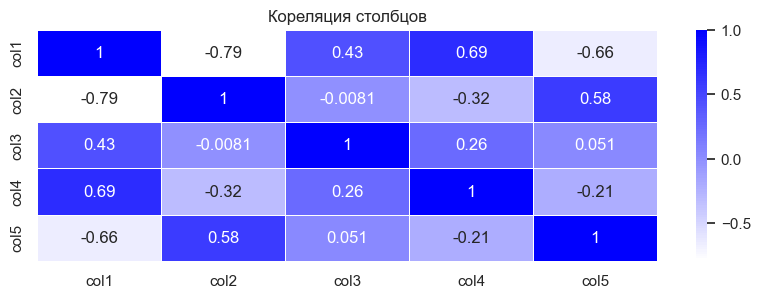

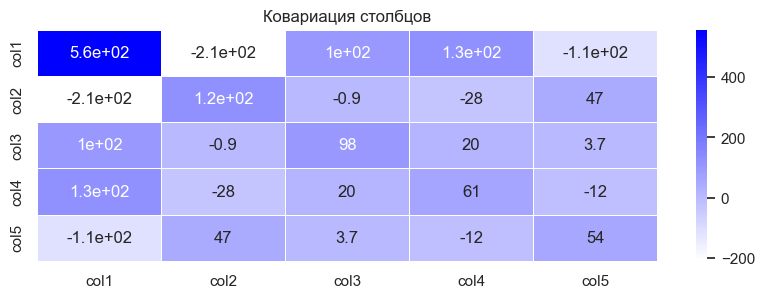

In [581]:
import matplotlib.colors as mcolors


df = pd.DataFrame({'col1': [1, 2, 7, 4, 56],
                   'col2': [1, 19, 6, 13, -10],
                   'col3': [2, 12, -9, 12, 15],
                   'col4': [1, 8, 15, 16, 21],
                   'col5': [7, 4, 3, 17, -3]})

corr = df.corr() # Корреляция
cov = df.cov()   # Ковариация

display(corr, cov)

# -------------------------------Мои палитры---------------------------------------------------
n_bins = 100

colors = [(1, 1, 1), (0, 0, 0)]
cmap_name_black = 'custom_black'

colors = [(1, 0, 0), (1, 1, 1)]
cmap_name_read = 'custom_red'

colors = [(1, 1, 1), (0, 0, 1)]
cmap_name_blue = 'custom_blue'

my_collor = mcolors.LinearSegmentedColormap.from_list(cmap_name_blue, colors, N=n_bins)

#--------------------------------Корреляция----------------------------------------------------
plt.figure(figsize=(10, 3))
sns.heatmap(corr, annot=True, cmap=my_collor, linewidths=0.666)

plt.title('Кореляция столбцов')

plt.show()

#--------------------------------Ковариация----------------------------------------------------
plt.figure(figsize=(10, 3))
sns.heatmap(cov, annot=True, cmap=my_collor, linewidths=0.666)

plt.title('Ковариация столбцов')

plt.show()


4. **Постройте столбчатую диаграмму, отражающую количество продаж товара за последние 6 месяцев.**

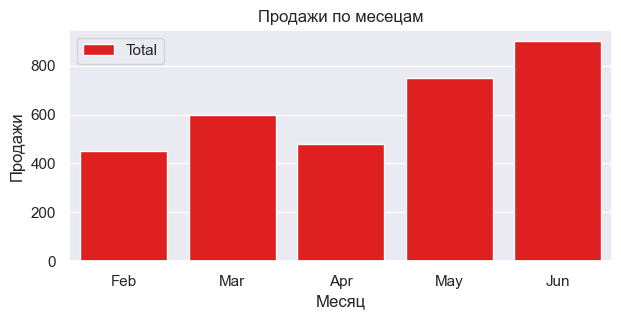

In [582]:
sales = pd.DataFrame({'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'],
                      'Sales': [350, 450, 600, 480, 750, 900]})

f, ax = plt.subplots(figsize=(7, 3))

sns.set_color_codes("muted")
sns.barplot(x="Month", y="Sales", data=sales, label="Total", color="red")

ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set(xlim=(0.5, 5.5), xlabel="Месяц", ylabel="Продажи")

plt.title('Продажи по месецам')


plt.show()

5. **Необходимо построить boxplot, отображающий распределение значений для трех признаков в предложенном датасете.**

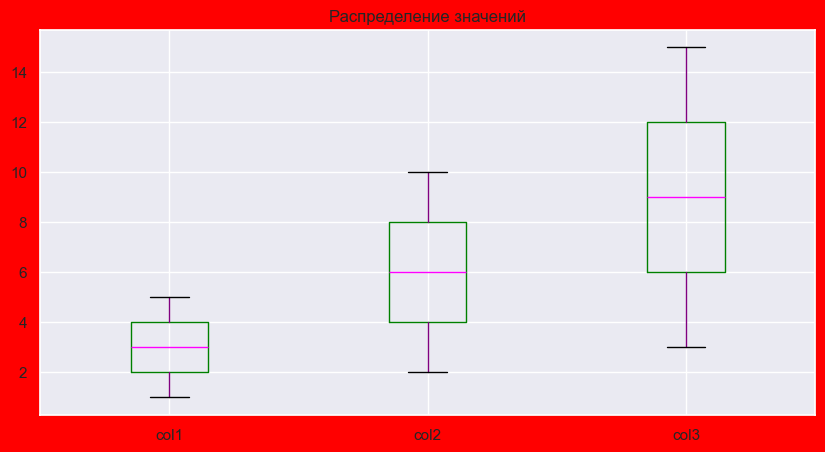

In [583]:
data = pd.DataFrame({'col1': [1, 2, 3, 4, 5],
                     'col2': [2, 4, 6, 8, 10],
                     'col3': [3, 6, 9, 12, 15]})

fig = plt.figure(figsize=(10,5))

fig.set_facecolor('red')

plt.boxplot(data, vert=True,
            boxprops=dict(color='green'),
            medianprops=dict(color='magenta'),
            whiskerprops=dict(color='purple'),
            flierprops=dict(color='blue'))

plt.xticks([1, 2, 3], data.columns)
plt.title('Распределение значений')

plt.show()

6. **Вам нужно построить гистограмму для данных о температуре воздуха в городе за последнюю неделю.**

,Temperature
0,17.483571
1,14.308678
2,18.238443
3,22.615149
4,13.829233


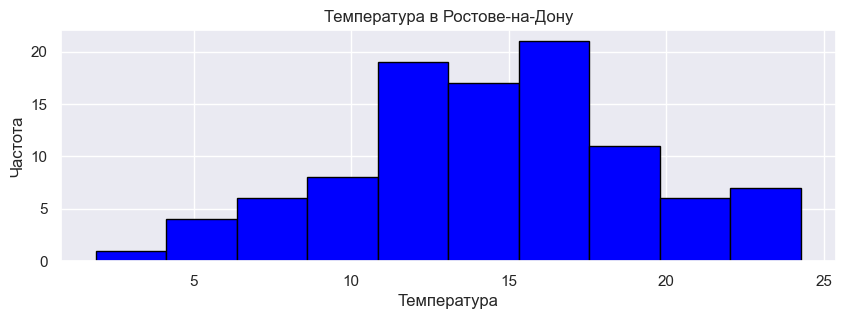

In [586]:
np.random.seed(42)
data = pd.DataFrame({'Temperature': np.random.normal(15, 5, 100)})

display(data.head(5))


# ЭТО ЗАДАНИЕ НЕЛЬЗЯ ВЫПОЛНИТЬ ДАННЫЕ КОТОРЫЕ ПРЕДОСТАВЛЕНЫ НЕ ПОЛНЫЕ
# - Нет города
# - Нет недели
# - Есть просто 100 непонятных температур

# Мое решение будет таким !
plt.figure(figsize=(10, 3))
plt.hist(data['Temperature'], bins=10, color='blue', edgecolor='black')

plt.xlabel('Температура')
plt.ylabel('Частота')
plt.title('Температура в Ростове-на-Дону')
plt.show()

7. **Вам предоставлены данные о продажах продуктов в магазине по категориям товаров. Ваша задача - построить круговую диаграмму, отображающую, какую долю продаж в магазине составляет каждая категория товаров.**

,Category,Sales
0,Electronics,25000
1,Apparel,20000
2,Beauty,15000
3,Grocery,30000


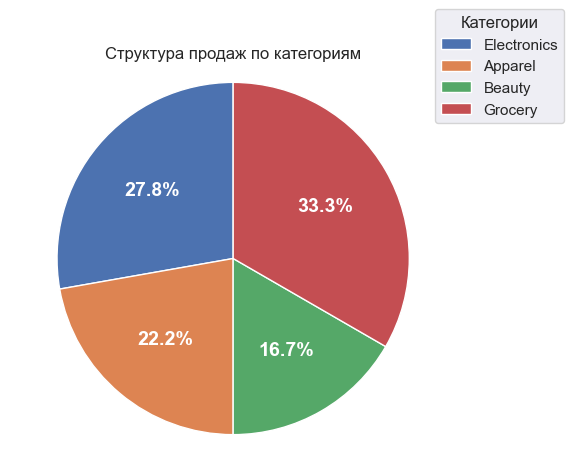

In [585]:
# создаем датафрейм с данными о продажах по категориям товаров
df = pd.DataFrame({
    'Category': ['Electronics', 'Apparel', 'Beauty', 'Grocery'],
    'Sales': [25000, 20000, 15000, 30000]
})

display(df.head())

fig, ax = plt.subplots(figsize=(5, 5))

wedges, texts, autotexts = ax.pie(df['Sales'], labels=df['Category'], autopct='%1.1f%%',
                                 startangle=90, textprops=dict(color="w"))
ax.legend(wedges, df['Category'], title='Категории', loc='center left', bbox_to_anchor=(1, 0, 1, 2))

ax.set_title("Структура продаж по категориям")
plt.setp(autotexts, size=14, weight="bold")

plt.axis('equal')
fig.set_facecolor('white')

plt.show()